<h1 style="
    font-family: 'Cormorant Garamond', serif; 
    color: #7A2E2E; 
    font-size: 56px; 
    font-weight: bold; 
    letter-spacing: 1px; 
    text-shadow: 1px 1px 2px #2A0F0F;">
    reel life, slightly distorted
</h1>

<h3 style="
    font-family: 'Merriweather', serif; 
    color: #FFFFFF; 
    font-size: 20px; 
    font-style: italic; 
    margin-top: -10px;
    text-shadow: 1px 1px 3px #000000;">
    exploring decades of cinematic change through data, because analyzing 45,000 movies is easier than watching them.
</h3>

In [7]:
#SETUP
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

sns.set_style("darkgrid")
plt.rcParams["font.family"] = "DejaVu Sans"
plt.rcParams["figure.figsize"] = (12, 7)

import sys
import os
# aggiungi la cartella src al path
sys.path.append(os.path.abspath("../src"))  
#import
from load_data import load_and_clean_data
# carica e pulisci il dataset
file_path = "../data/movies_metadata.csv"
df = load_and_clean_data(file_path)
#check
df.head()

Dataset loaded successfully, first 5 rows:


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


,title,original_title,genres,release_date,budget,revenue,runtime,vote_average,vote_count,genre_names,main_genre,release_year,decade,profit,roi,runtime_category,is_profitable,log_budget,log_revenue,log_profit
0,Toy Story,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",1995-10-30,30000000.0,373554033.0,81.0,7.7,5415.0,"[Animation, Comedy, Family]",Animation,1995,1990,343554033.0,11.451801,Standard,True,17.216708,19.738573,19.654855
1,Jumanji,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",1995-12-15,65000000.0,262797249.0,104.0,6.9,2413.0,"[Adventure, Fantasy, Family]",Adventure,1995,1990,197797249.0,3.043035,Standard,True,17.989898,19.386893,19.102753
2,Grumpier Old Men,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",1995-12-22,0.0,0.0,101.0,6.5,92.0,"[Romance, Comedy]",Romance,1995,1990,0.0,NaN,Standard,False,NaN,NaN,NaN
3,Waiting to Exhale,Waiting to Exhale,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",1995-12-22,16000000.0,81452156.0,127.0,6.1,34.0,"[Comedy, Drama, Romance]",Comedy,1995,1990,65452156.0,4.090760,Long,True,16.588099,18.215526,17.996830
4,Father of the Bride Part II,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}]",1995-02-10,0.0,76578911.0,106.0,5.7,173.0,[Comedy],Comedy,1995,1990,76578911.0,NaN,Standard,True,NaN,18.153832,18.153832


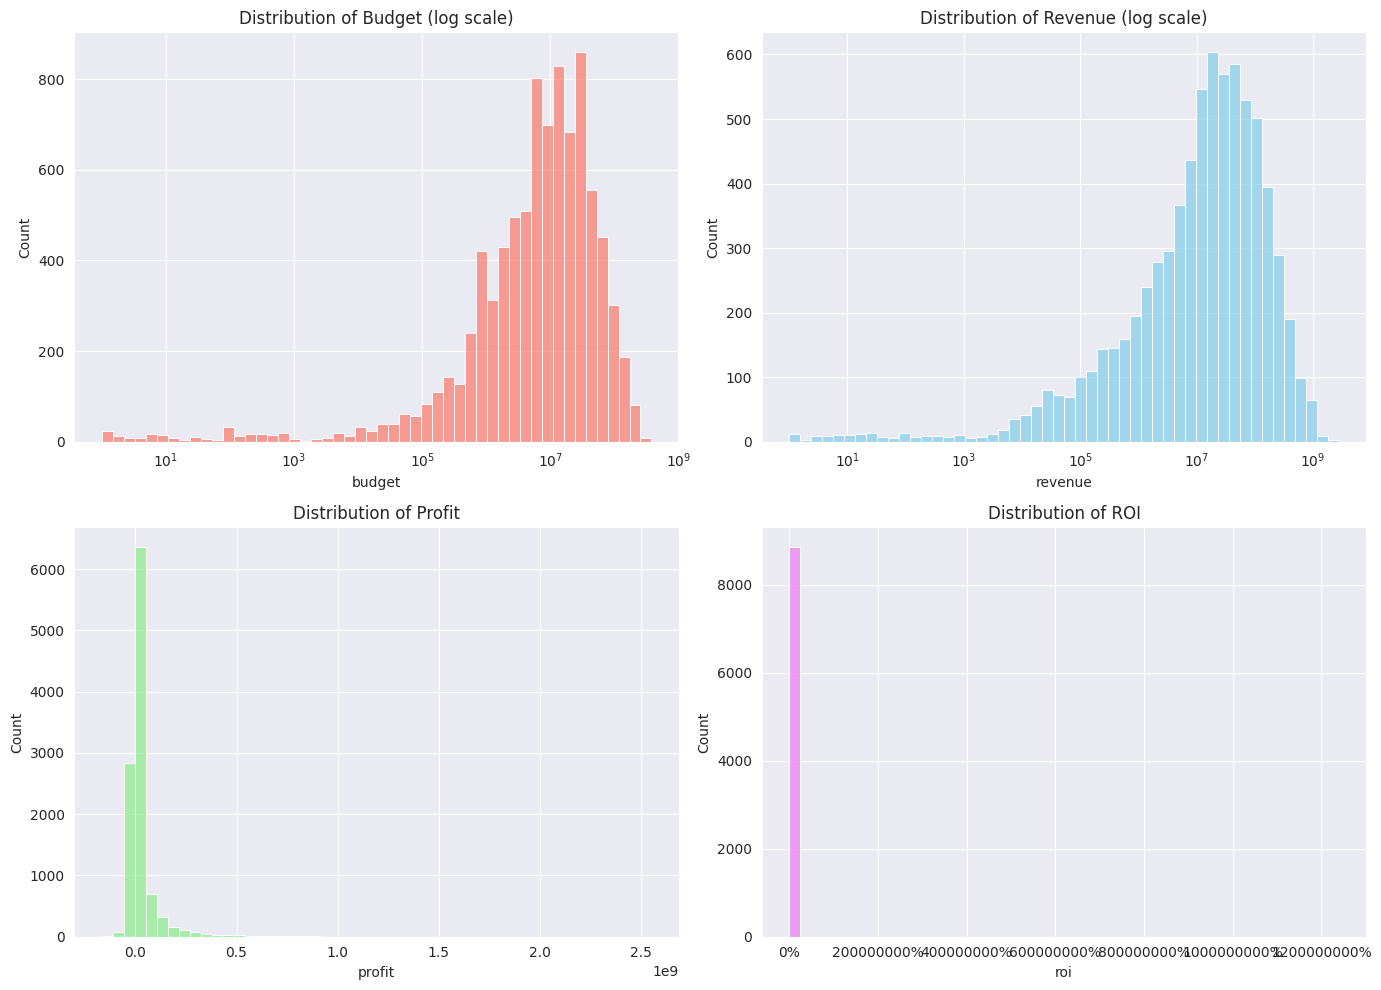

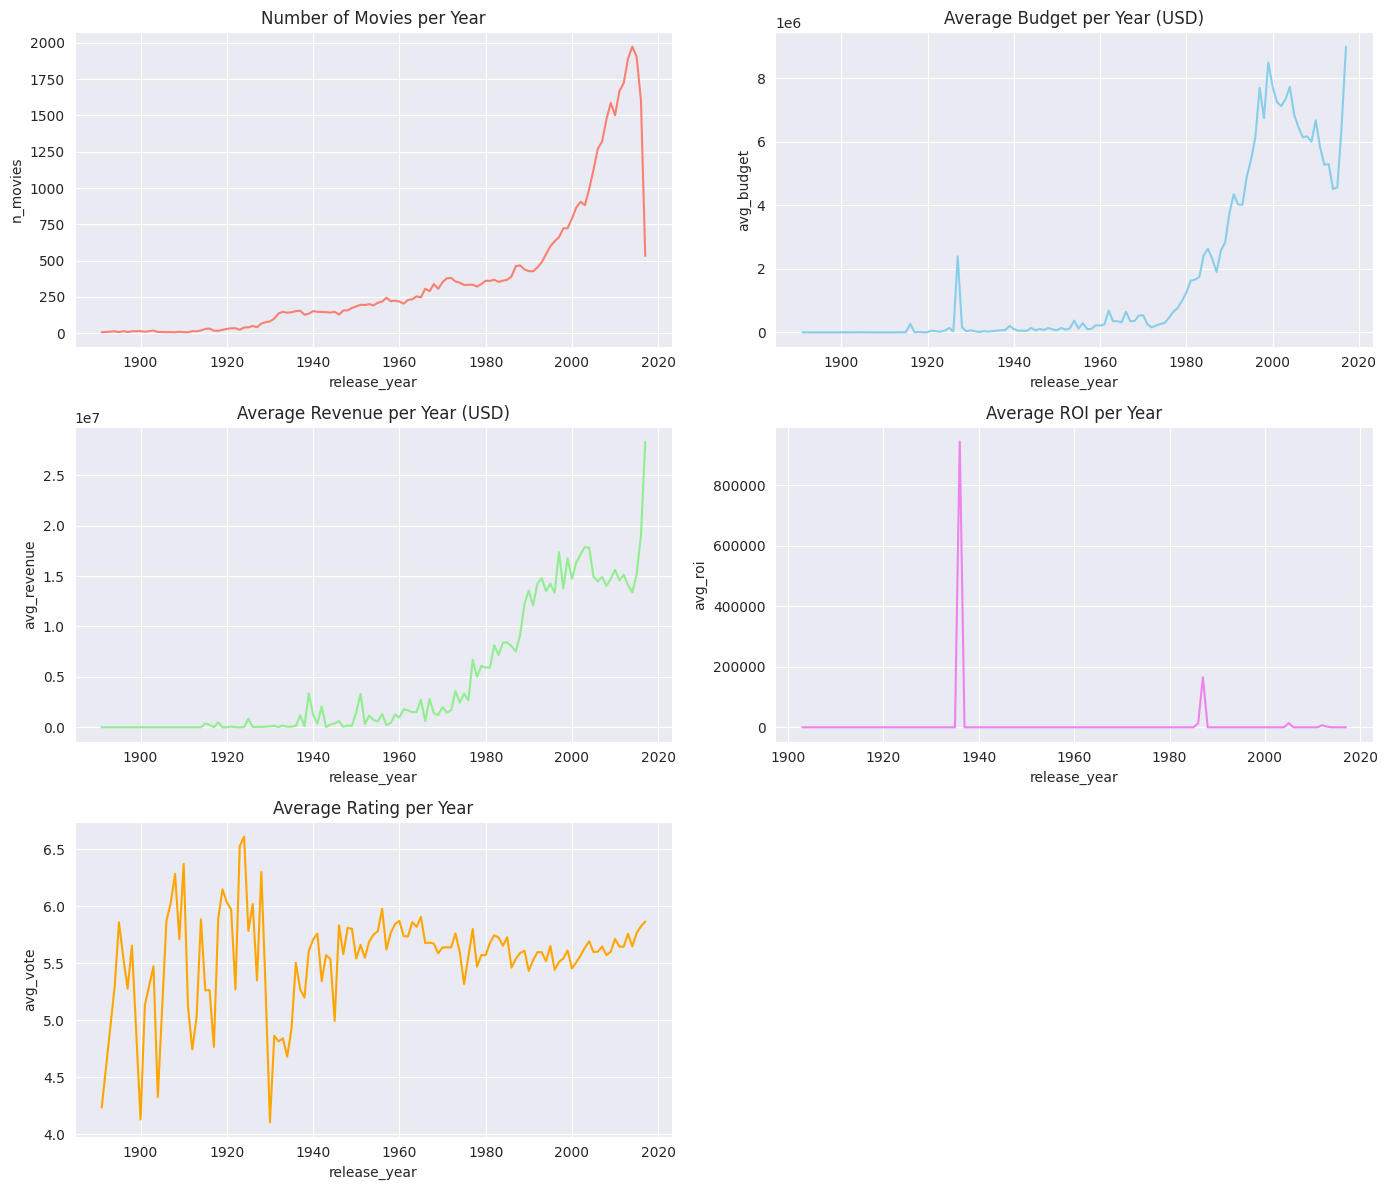

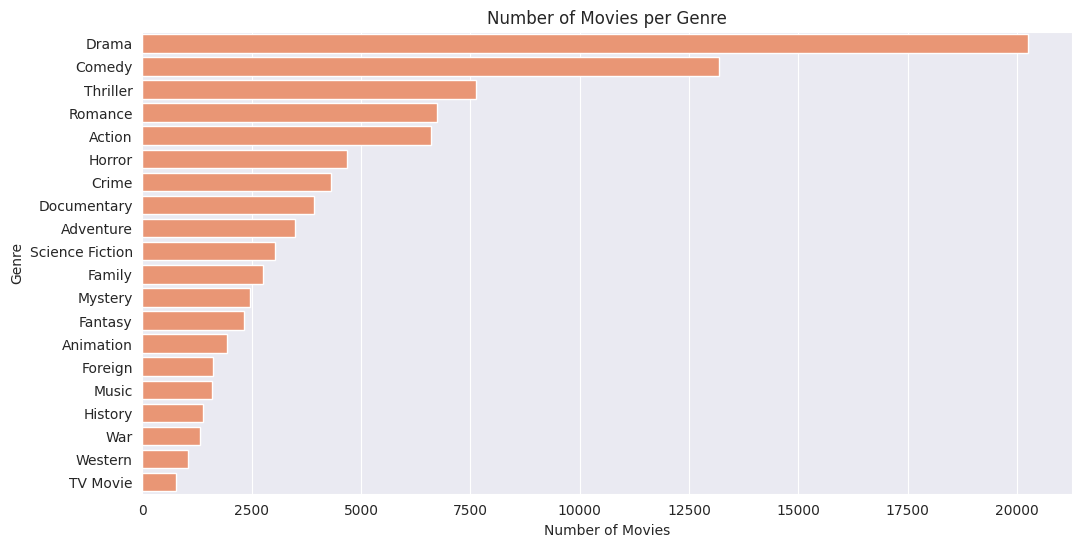

Most profitable genre (average profit): Adventure → 38446026.65054379
Genre with highest average budget: Adventure → 18829114.58614768
Genre with highest average revenue: Adventure → 57275141.23669147


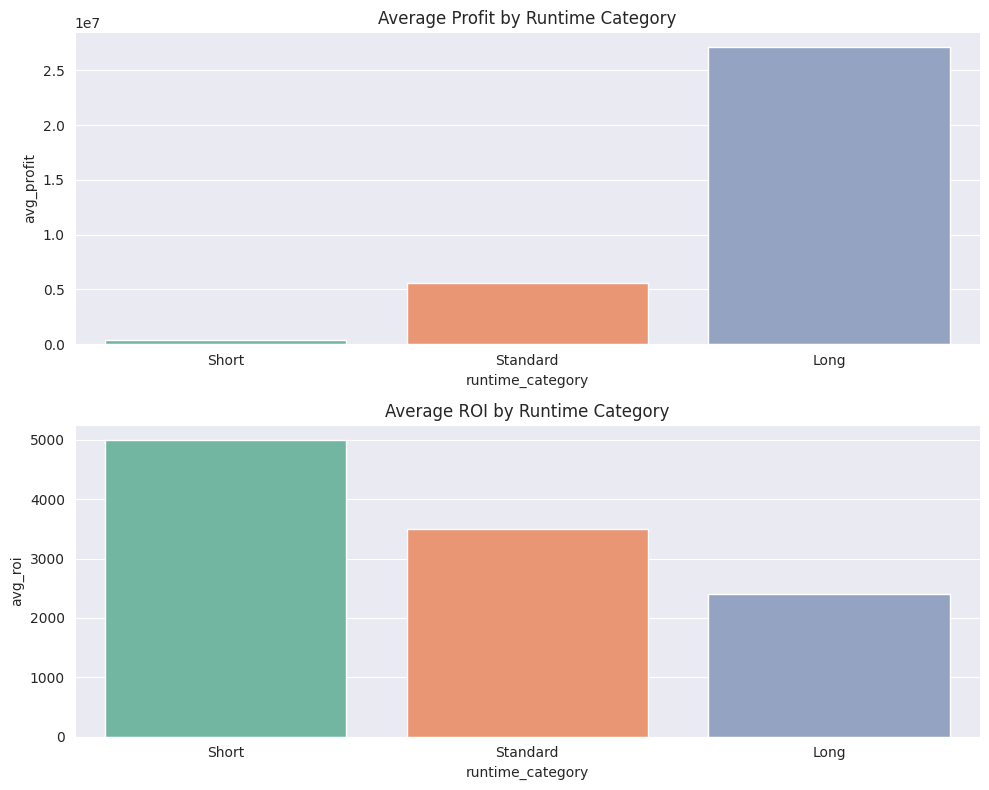

In [8]:
# EXPLORATORY DATA ANALYSIS (EDA)
import matplotlib.ticker as mtick

#A.DISTRIBUTIONS
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
#1.budget (log scale)
sns.histplot(df['budget'].replace(0, np.nan), log_scale=True, bins=50, ax=axes[0,0], color='salmon')
axes[0,0].set_title("Distribution of Budget (log scale)")
#2.revenue (log scale)
sns.histplot(df['revenue'].replace(0, np.nan), log_scale=True, bins=50, ax=axes[0,1], color='skyblue')
axes[0,1].set_title("Distribution of Revenue (log scale)")
#3.profit
sns.histplot(df['profit'].replace(0, np.nan), bins=50, ax=axes[1,0], color='lightgreen')
axes[1,0].set_title("Distribution of Profit")
#4.roi
sns.histplot(df['roi'].replace(0, np.nan), bins=50, ax=axes[1,1], color='violet')
axes[1,1].set_title("Distribution of ROI")
axes[1,1].xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.tight_layout()
plt.show()

#B. TRENDS OVER TIME
df_years = df.groupby('release_year').filter(lambda x: len(x) > 5)
df_yearly = df_years.groupby('release_year').agg(
    n_movies=('title', 'count'),
    avg_budget=('budget', 'mean'),
    avg_revenue=('revenue', 'mean'),
    avg_roi=('roi', 'mean'),
    avg_vote=('vote_average', 'mean')
).reset_index()
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
sns.lineplot(data=df_yearly, x='release_year', y='n_movies', ax=axes[0,0], color='salmon')
axes[0,0].set_title("Number of Movies per Year")
sns.lineplot(data=df_yearly, x='release_year', y='avg_budget', ax=axes[0,1], color='skyblue')
axes[0,1].set_title("Average Budget per Year (USD)")
sns.lineplot(data=df_yearly, x='release_year', y='avg_revenue', ax=axes[1,0], color='lightgreen')
axes[1,0].set_title("Average Revenue per Year (USD)")
sns.lineplot(data=df_yearly, x='release_year', y='avg_roi', ax=axes[1,1], color='violet')
axes[1,1].set_title("Average ROI per Year")
sns.lineplot(data=df_yearly, x='release_year', y='avg_vote', ax=axes[2,0], color='orange')
axes[2,0].set_title("Average Rating per Year")
axes[2,1].axis('off')  # empty subplot
plt.tight_layout()
plt.show()

#C. GENRES
genre_stats = df.explode('genre_names').groupby('genre_names').agg(
    n_movies=('title', 'count'),
    avg_profit=('profit', 'mean'),
    avg_budget=('budget', 'mean'),
    avg_revenue=('revenue', 'mean')
).sort_values('n_movies', ascending=False)
#number of movies per genre
plt.figure(figsize=(12,6))
sns.barplot(
    x='n_movies',
    y=genre_stats.index,
    data=genre_stats.reset_index(),
    color=sns.color_palette("Set2")[1],  # usa colore singolo senza palette
)
plt.title("Number of Movies per Genre")
plt.xlabel("Number of Movies")
plt.ylabel("Genre")
plt.show()
#most profitable genre
print("Most profitable genre (average profit):", genre_stats['avg_profit'].idxmax(), "→", genre_stats['avg_profit'].max())
# Genre with highest average budget
print("Genre with highest average budget:", genre_stats['avg_budget'].idxmax(), "→", genre_stats['avg_budget'].max())
# Genre with highest average revenue
print("Genre with highest average revenue:", genre_stats['avg_revenue'].idxmax(), "→", genre_stats['avg_revenue'].max())

#D. RUNTIME
runtime_stats = df.groupby('runtime_category', observed=True).agg(
    avg_profit=('profit', 'mean'),
    avg_roi=('roi', 'mean')
).reset_index()
fig, axes = plt.subplots(2, 1, figsize=(10,8))
sns.barplot(data=runtime_stats, x='runtime_category', y='avg_profit', hue='runtime_category', dodge=False, palette='Set2', ax=axes[0], legend=False)
axes[0].set_title("Average Profit by Runtime Category")
sns.barplot(data=runtime_stats, x='runtime_category', y='avg_roi', hue='runtime_category', dodge=False, palette='Set2', ax=axes[1], legend=False)
axes[1].set_title("Average ROI by Runtime Category")
plt.tight_layout()
plt.show()

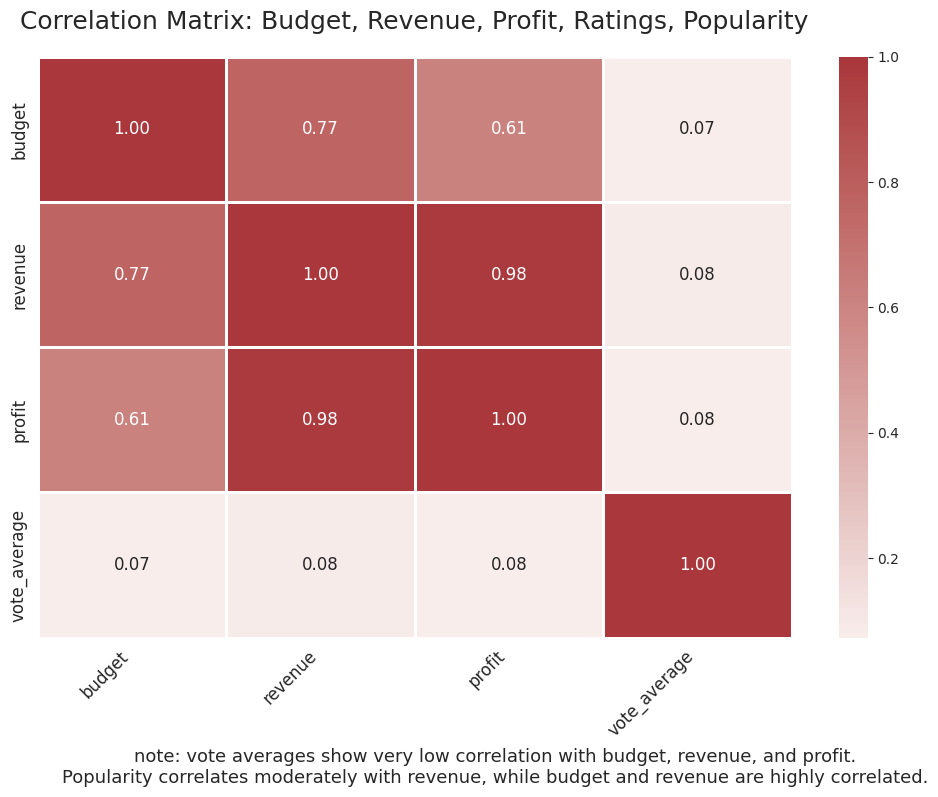

In [10]:
# CORRELATION ANALYSIS WITH BOTTOM NOTE
import matplotlib.pyplot as plt
import seaborn as sns
# seleziona le colonne numeriche rilevanti
numeric_cols = ['budget', 'revenue', 'profit', 'vote_average']
if 'popularity' in df.columns:
    numeric_cols.append('popularity')
#correlation matrix
corr_matrix = df[numeric_cols].corr()
#create heatmap
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap='vlag',   
    center=0, 
    linewidths=1,         
    linecolor='white',    
    annot_kws={"size":12},
    ax=ax
)
# formattazione assi
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
ax.set_title("Correlation Matrix: Budget, Revenue, Profit, Ratings, Popularity", fontsize=18, pad=20)
# note
fig.text(
    0.5, 0.01,  
    "note: vote averages show very low correlation with budget, revenue, and profit.\n"
    "Popularity correlates moderately with revenue, while budget and revenue are highly correlated.",
    fontsize=13,
    ha='center',
    va='bottom',
    fontname='DejaVu Sans'
)
plt.tight_layout(rect=[0,0.05,1,1])
plt.show()